In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Text(0, 0.5, 'features_3')

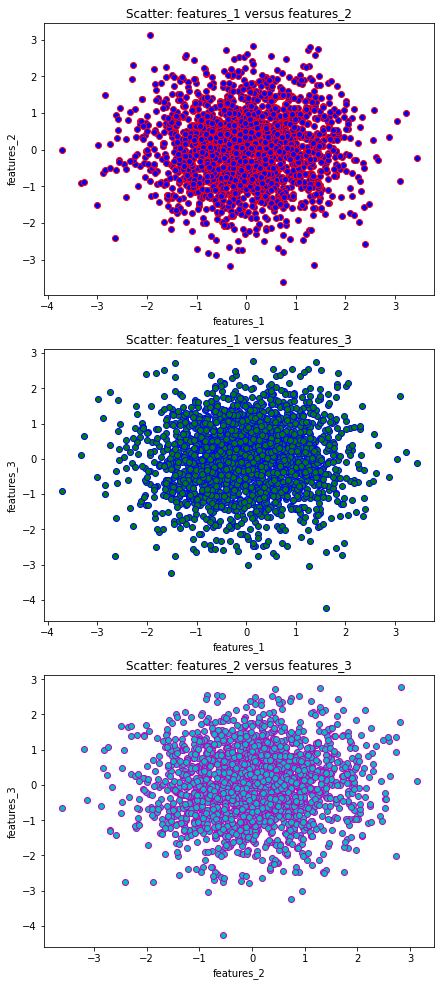

In [2]:
regressions = pd.read_csv('regression_generated.csv')

fig, (ax12, ax13, ax23) = plt.subplots(nrows=3, ncols=1, figsize=(7, 17))

ax12.scatter(x = regressions['features_1'], y = regressions['features_2'], c='b', edgecolor='r')
ax12.set_title('Scatter: features_1 versus features_2') # The dollar sign indicates the latex math mode
ax12.set_xlabel('features_1')
ax12.set_ylabel('features_2')

ax13.scatter(regressions['features_1'], regressions['features_3'], c='g', edgecolor='b')
ax13.set_title('Scatter: features_1 versus features_3') # The dollar sign indicates the latex math mode
ax13.set_xlabel('features_1')
ax13.set_ylabel('features_3')

ax23.scatter(regressions['features_2'], regressions['features_3'], c='c', edgecolor='m')
ax23.set_title('Scatter: features_2 versus features_3') # The dollar sign indicates the latex math mode
ax23.set_xlabel('features_2')
ax23.set_ylabel('features_3')


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

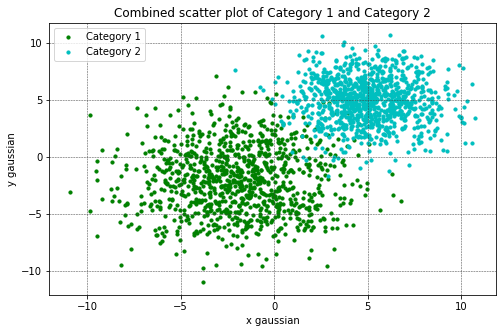

In [3]:
x_category1 = np.random.normal(loc=-2., scale=3., size=(1000,))
y_category1 = np.random.normal(loc=-2., scale=3., size=(1000,))

x_category2 = np.random.normal(loc=5., scale=2., size=(1000,))
y_category2 = np.random.normal(loc=5., scale=2., size=(1000,))

dataset = pd.DataFrame({
    'Category 1' : x_category1*y_category1,
    'Category 2' : x_category2*y_category2})

dataset

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_category1, y_category1, s=10, c='g', marker="o", label='Category 1')
ax.scatter(x_category2, y_category2, s=10, c='c', marker="o", label='Category 2')

ax.set_title('Combined scatter plot of Category 1 and Category 2')
ax.legend(loc='upper left')
ax.set_xlabel('x gaussian')
ax.set_ylabel('y gaussian')

ax.grid(linestyle="--", linewidth=0.5, color='.25')

plt.show()

#plt.scatter(x = x_category2, y = y_category2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import seaborn as sns
import pickle

with open('residuals_261.pkl', 'rb') as inputfile:
    infile = pickle.load(inputfile)

diction = infile.flatten()[0]
datas = pd.DataFrame.from_dict(diction)

clean_datas = datas.query('abs(residuals)<2')

clean_datas

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


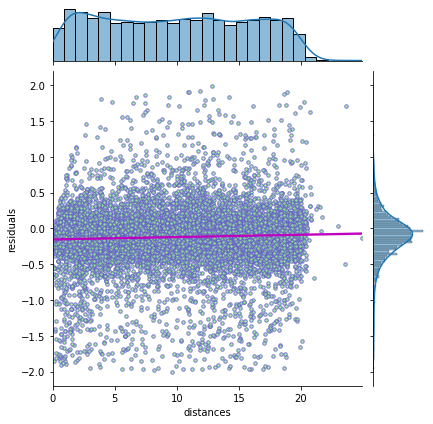

In [5]:
# Seaborn jointplot
sns.jointplot(x="distances", y="residuals", data=clean_datas, kind="reg", joint_kws={"scatter_kws":{"color":"LightGreen", "edgecolors":"SlateBlue", "s":12}, "line_kws":{"color":"m"}})

Text(0.5, 1.0, 'Profile histogram of distance')

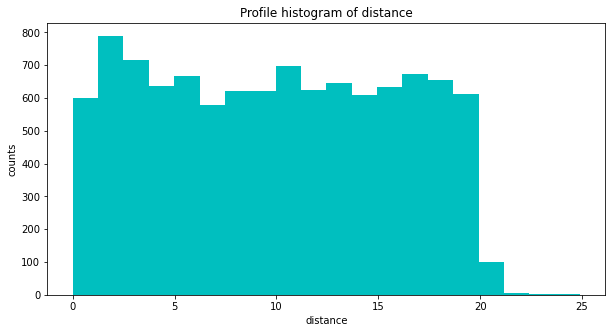

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

bin_counts, bin_edges, _ = ax.hist(clean_datas['distances'], bins = 20, color="c")
ax.set_xlabel('distance')
ax.set_ylabel('counts')
ax.set_title('Profile histogram of distance')

In [7]:
x = np.array((bin_edges[0:20]+bin_edges[1:21])/2)

bin_indices = np.digitize(clean_datas["distances"], bin_edges)
y = np.zeros(20)
error_y = np.zeros(20)
for i in range(20):
    y[i] += [clean_datas["residuals"][bin_indices == i+1].mean(),]
    error_y[i] += [clean_datas["residuals"][bin_indices == i+1].std(),]

print("X array:")
print(str(x) + "\n")
print("Y array:")
print(str(y) + "\n")
print("Y errors array:")
print(str(error_y) + "\n")


X array:
[ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775]

Y array:
[-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714         nan]

Y errors array:
[0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]



<ErrorbarContainer object of 3 artists>

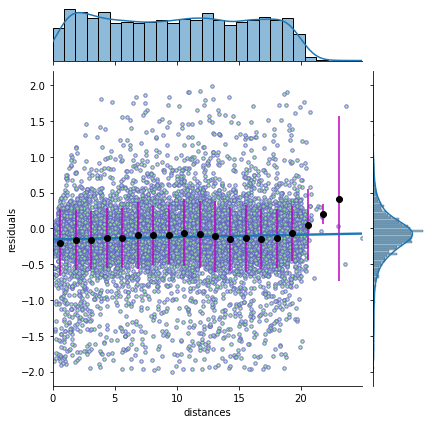

In [8]:
sns.jointplot(x="distances", y="residuals", data=clean_datas, kind="reg", joint_kws={"scatter_kws":{"color":"LightGreen", "edgecolors":"SlateBlue", "s":12}})
plt.errorbar(x=x, y=y, yerr=error_y, ecolor="m", fmt="ko")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


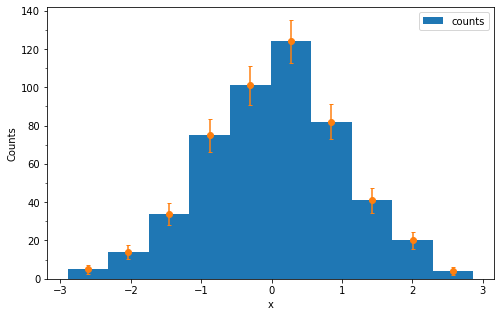

In [9]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy.integrate import trapz

x = np.random.normal(loc=0., scale=1., size=(500,))

fig, ax = plt.subplots(figsize=(8, 5))

bin_counts, bin_edges, _ = ax.hist(x, bins=10, label='counts')

y_error = np.sqrt(bin_counts)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

ax.errorbar(x=bin_centres, y=bin_counts, yerr=y_error, fmt='o', capsize=2)

ax.legend(loc='upper right')
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlabel('x')
ax.set_ylabel('Counts')

bin_width = bin_edges[1] - bin_edges[0]
int_hist = bin_width * sum(bin_counts[:])

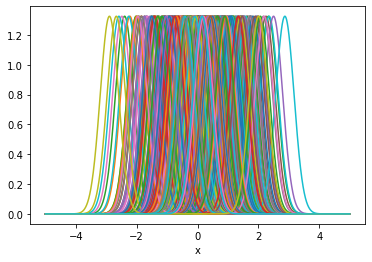

In [10]:
std = 1.06 * x.std() * x.size ** (-1/5.0)
y = np.arange(-5,5,0.001)
f = np.array([norm.pdf(y,x[i],std) for i in range(len(x))])
for i in range(len(x)):
    plt.plot(y,f[i])
plt.xlabel("x")
plt.show()

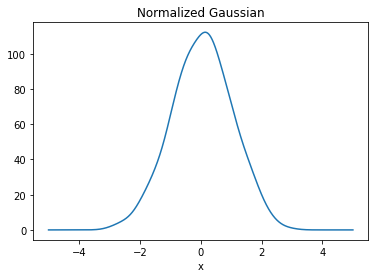

In [11]:
gaussian_sum = np.sum(f, axis=0)

int_dist = trapz(gaussian_sum,y)
plt.plot(y,gaussian_sum*int_hist/int_dist)
plt.xlabel("x")
plt.title("Normalized Gaussian")
plt.show()

Text(0.5, 0, 'x')

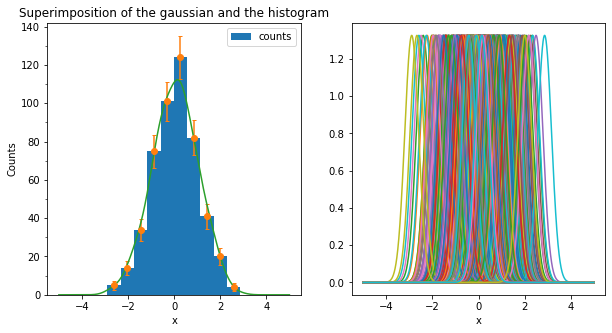

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

bin_counts, bin_edges, _ = ax1.hist(x, bins=10, label='counts')
ax1.errorbar(x=bin_centres, y=bin_counts, yerr=y_error, fmt='o', capsize=2)

ax1.legend(loc='upper right')
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.yaxis.set_minor_locator(MultipleLocator(10))
ax1.set_xlabel('x')
ax1.set_ylabel('Counts')
ax1.set_title('Superimposition of the gaussian and the histogram')

ax1.plot(y, gaussian_sum*int_hist/int_dist)

for i in range(len(x)):
    ax2.plot(y,f[i])
ax2.set_xlabel("x")